# 2021-08-20 Puzzler Classic

When you roll a pair of fair dice, the most likely outcome is 7 (which occurs 1/6 of the time) and the least likely outcomes are 2 and 12 (which each occur 1/36 of the time).

Annoyed by the variance of these probabilities, I set out to create a pair of “uniform dice.” These dice still have sides that are uniquely numbered from 1 to 6, and they are identical to each other. However, they are weighted so that their sum is more uniformly distributed between 2 and 12 than that of fair dice.

Unfortunately, it is impossible to create a pair of such dice so that the probabilities of all 11 sums from 2 to 12 are identical (i.e., they are all 1/11). But I bet we can get pretty close.

The variance of the 11 probabilities is the average value of the squared difference between each probability and the average probability (which is, again, 1/11). One way to make my dice as uniform as possible is to minimize this variance.

So how should I make my dice as uniform as possible? In other words, which specific weighting of the dice minimizes the variance among the 11 probabilities? That is, what should the probabilities be for rolling 1, 2, 3, 4, 5 or 6 with one of the dice?

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
pu = [1/6] * 6

data=[]
for d1 in range(1, 7):
    for d2 in range(1, 7):
        data.append((d1, pu[d1-1], d2, pu[d2-1]))
df=pd.DataFrame(data=data, columns=('d1', 'p1', 'd2', 'p2'))
df['dsum']=df['d1']+df['d2']
df['psum']=df['p1']*df['p2']
df.head()

,d1,p1,d2,p2,dsum,psum
0,1,0.166667,1,0.166667,2,0.027778
1,1,0.166667,2,0.166667,3,0.027778
2,1,0.166667,3,0.166667,4,0.027778
3,1,0.166667,4,0.166667,5,0.027778
4,1,0.166667,5,0.166667,6,0.027778


In [23]:
df['psum'].sum()

1.0

In [44]:
dfsum=df[['dsum', 'psum']].groupby(['dsum']).sum().reset_index()
dfsum['p_uniform']=1/dfsum['psum'].count()
dfsum['variance']=np.square(dfsum['psum']-dfsum['p_uniform'])
dfsum

,dsum,psum,p_uniform,variance
0,2,0.027778,0.090909,0.003986
1,3,0.055556,0.090909,0.001250
2,4,0.083333,0.090909,0.000057
3,5,0.111111,0.090909,0.000408
4,6,0.138889,0.090909,0.002302
5,7,0.166667,0.090909,0.005739
6,8,0.138889,0.090909,0.002302
7,9,0.111111,0.090909,0.000408
8,10,0.083333,0.090909,0.000057
9,11,0.055556,0.090909,0.001250


In [46]:
dfsum['variance'].mean()

0.0019768390980512197

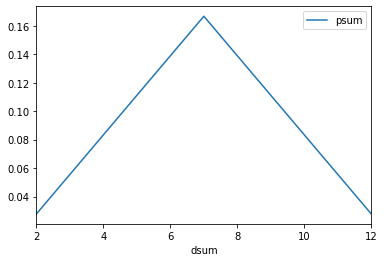

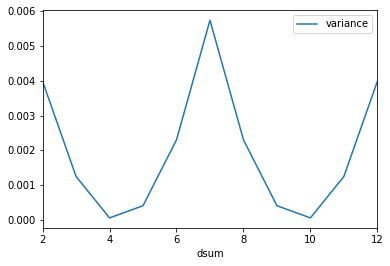

In [48]:
dfsum.plot(x='dsum', y='psum')
dfsum.plot(x='dsum', y='variance')